# Mini Course: Matrix Eigendecomposition
## Session 1: Basics

### Quick matrix tutorial
Let's go through Numpy's syntax for matric manipulations 

In [ ]:
# Install packages if necessary
import sys
!{sys.executable} -m pip install numpy matplotlib scipy ipywidgets
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Defining a vector (really, an array)
vec = np.array([10, 20, 30])
# Defining a matrix (also an array)
matrix = np.array([ [1, 2, 3]
                  , [4, 5, 6]
                  , [7, 8, 9]])

# Number of dimensions
vec.ndim # 1
matrix.ndim # 2

# Shape, note: don't write matrix.shape()
vec.shape # (3, )
matrix.shape # (3, 3)

# Get elements
matrix[1, 2] # 6
matrix[-1, -1] # 9
matrix[1, :] # array([4, 5, 6])
matrix[:, 1] # array([2, 5, 8])

# Matrix Multiplication
matrix @ matrix # array([[ 30,  36,  42], [ 66,  81,  96], [102, 126, 150]])
matrix @ vec # array([140, 320, 500])

# Element-by-element operations
matrix * matrix # array([[ 1,  4,  9], [16, 25, 36], [49, 64, 81]])
matrix * vec # array([[ 10,  40,  90], [ 40, 100, 180], [ 70, 160, 270]])
matrix + matrix # array([[ 2,  4,  6], [ 8, 10, 12], [14, 16, 18]])

# Applying a function to elements
np.sin(matrix) # array([[ 0.84147098,  0.90929743,  0.14112001], ...)
np.exp(matrix) # array([[2.71828183e+00, 7.38905610e+00, 2.00855369e+01], ...)


# Matrix operations
matrix.T # array([[1, 4, 7], [2, 5, 8], [3, 6, 9]])
(matrix + 1j * matrix).conjugate() # array([[1.-1.j, 2.-2.j, 3.-3.j], [4.-4.j, 5.-5.j, 6.-6.j], [7.-7.j, 8.-8.j, 9.-9.j]])
matrix.diagonal() # Get diagonal: array([1, 5, 9])
np.diag(vec) # Transforms a vector into a diagonal matrix
matrix.trace() # 15
matrix.sort() # Sorts columns in place
matrix.round(14) # Rounds matric elements to 14 significant digits


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Eigendecomposition

Let's explore eigendecompositions with Python

In [28]:
np.linalg.eigvals(matrix) # array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])
np.linalg.eig(matrix) # (array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15]), array([[-0.23197069, -0.78583024,  0.40824829],...))

# The columns are eigenvectors are normalized
(vals, vecs) = np.linalg.eig(matrix)
vecs[:, 1] @ vecs[:, 1] # 0.9999999999999997

# Multiplying the matrix by an eigenvector gets the same eigenvector multiplied by its eigenvalue
(matrix @ vecs[:, 1] - vals[1] * vecs[:, 1]).round(14) # array([-0., -0., -0.])

# diag(vals) = inverse(vals) * matrix * diag(vals)
(np.linalg.inv(vecs) @ matrix @ vecs - np.diag(vals)).round(14) # array([[ 0.,  0., -0.],  [-0., -0.,  0.],[-0., -0.,  0.]])

# matrix = vecs * diag(vals) * inverse(vals)
(vecs@  np.diag(vals) @ np.linalg.inv(vecs)  - matrix).round(14)  # array([[ 0.,  0., -0.],  [-0., -0.,  0.],[-0., -0.,  0.]])

# Trace of matrix is equal to trace of vals
(matrix.trace() - np.diag(vals).trace()).round(14) # 0.0

0.0

### Application 1 - Powers of matrices

Let's consider the political parties of a small country. There are 3 parties, S, T and U. After each election cycle, some people leave their party for a different one, while some remain. The probability of people switching parties is give by the matrix

$$ 
P = \left(
\begin{array}
0.6 & 0.3 & 0.3 \\
0.2 & 0.6 & 0.2\\
0.2 & 0.1 & 0.5
\end{array}
\right)
$$

The first row can be read as "60% of people in party S are expected to remain in party S, 30% of people in party T will join S as well as 30% of people from party U"

The first column can be read as "60% of people in party S are expected to remain in party S, 20% are expected to switch to party T and 20% to party U". 

1. Starting with an arbitrary initial population (e.g. $(0.3, 0.5, 0.2)$) for the parties, what will be the population after 1 election cycle?
1. What will be the population after 2, 3, 4 election cycle? n election cycles?
1. Calculate the population after $n$ election cycles using matrix diagonalization
1. What is particular about that population?

In [46]:
P=np.array([[0.6, 0.3, 0.3], [0.2, 0.6, 0.2], [0.2, 0.1, 0.5]])

pop = np.array([.3,.5,.2])

print(P @ pop)
print(P @ P @ pop)
print(P @ P @ P @ pop)
print(P @ P @ P @ P @ pop)
print(P @ P @ P @ P @ P @ pop)

(vals, vecs) = np.linalg.eig(P)
print("\nEigenvalues:", vals, "\nEigenvectors:\n", vecs)

n = 100
print(f"After {n} cycles:", vecs @ np.diag(vals)**n @ np.linalg.inv(vecs) @ pop )

print("\nFirst eigenvector normalized to sum to 1:", vecs[:, 0] / np.sum(vecs[:, 0]) )

[0.39 0.4  0.21]
[0.417 0.36  0.223]
[0.4251 0.344  0.2309]
[0.42753 0.3376  0.23487]
[0.428259 0.33504  0.236701]

Eigenvalues: [1.  0.3 0.4] 
Eigenvectors:
 [[ 7.22897396e-01  7.07106781e-01 -4.80740672e-17]
 [ 5.62253530e-01  1.35149070e-16 -7.07106781e-01]
 [ 4.01609664e-01 -7.07106781e-01  7.07106781e-01]]
After 100 cycles: [0.42857143 0.33333333 0.23809524]

First eigenvector normalized to sum to 1: [0.42857143 0.33333333 0.23809524]


### Application 2 - Exponential of a function

Compute the exponential of a matrix with
1. The built-in `scipy.linalg.expm` function
1. The eigendecomposition of the matrix
and compare the results



In [58]:
matrix = np.array([ [1, 2, 3]
                  , [4, 5, 6]
                  , [7, 8, 9]])

print("Built-in:", scipy.linalg.expm(matrix))

(vals, vecs) = np.linalg.eig(matrix)

print("\nDiagonalization", vecs @ np.exp(np.diag(vals)) @ np.linalg.inv(vecs)  )


Built-in: [[1118906.69941319 1374815.06293581 1630724.42645843]
 [2533881.04189898 3113415.03138057 3692947.02086215]
 [3948856.38438478 4852012.99982532 5755170.61526587]]

Diagonalization [[1118906.30444901 1374816.07413279 1630724.35072365]
 [2533882.45988323 3113416.40125907 3692946.84336731]
 [3948856.18397851 4852012.66488614 5755169.64035151]]


### Application 3 - Geometric transformation interpretation


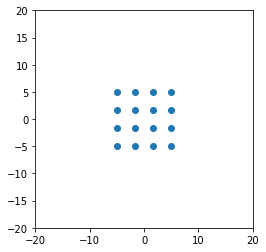

In [164]:
line = np.linspace(-5, 5, num = 4)
square = np.array([[i, j] for i in line for j in line]).T
fig1, ax1 = plt.subplots()
ax1.scatter(square[0, :], square[1, :])
plt.xlim([-20, 20])
plt.ylim([-20, 20])

ax1.set_aspect('equal')

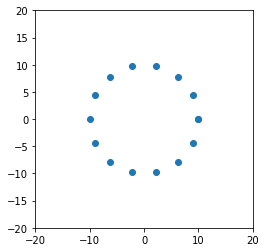

In [143]:
theta = np.linspace(0, 2 * np.pi, num = 15) 
x = 10 * np.cos(theta)
y = 10 * np.sin(theta)
circle = np.array([x, y])

fig1, ax1 = plt.subplots()
ax1.scatter(circle[0, :], circle[1, :])
plt.xlim([-20, 20])
plt.ylim([-20, 20])

ax1.set_aspect('equal')

In [166]:
shape = circle
shape = square
@interact(a=0.0, b=1.0,c=1.0,d= 0.0,t=(0.0, 1.0), eig = False) # x-y inverse
#@interact(a=1.0, b=1.0,c=0.0,d= 1.0,t=(0.0, 1.0), eig = False) # x shear - not diagonalizable
#@interact(a=2.0, b=0.0,c=0.0,d= 2.0, t=(0.0, 1.0), eig = False) # Identity
def g(a, b, c, d, t, eig):
    transformation = np.array([[a, b], [c, d]])
    print("Transformation:", transformation)
    
    transformed = transformation @ shape
    
    intermediate = (1 - t) * shape + t * transformed
    
    (vals, vecs) = np.linalg.eig(transformation)
    print(vals, vecs)
    
    fig1, ax1 = plt.subplots()
    ax1.scatter(shape[0, :], shape[1, :])
    ax1.scatter(intermediate[0, :], intermediate[1, :])
    for  [x1, y1] in shape.T:
        ax1.plot((0, x1), (0, y1), 'skyblue')
        plt.xlim([-20, 20])
        plt.ylim([-20, 20])
    for [x0, y0], [x1, y1] in zip(shape.T,intermediate.T) :
        ax1.plot((x0, x1), (y0, y1), 'salmon')
        plt.xlim([-20, 20])
        plt.ylim([-20, 20])
        
    plt.xlim([-20, 20])
    plt.ylim([-20, 20])
    r = 5 # Arrow scale
    if eig:
        ax1.arrow(0,0,r * vals[0] * vecs[0,0], r * vals[0] * vecs[1,0],head_width=1,head_length=2)
        ax1.arrow(0,0,r * vals[1] * vecs[0,1], r * vals[1] * vecs[1,1],head_width=1,head_length=2)
    ax1.set_aspect('equal')


interactive(children=(FloatSlider(value=0.0, description='a', max=1.0), FloatSlider(value=1.0, description='b'…